In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

df = pd.read_csv("merged_cleaned.csv")

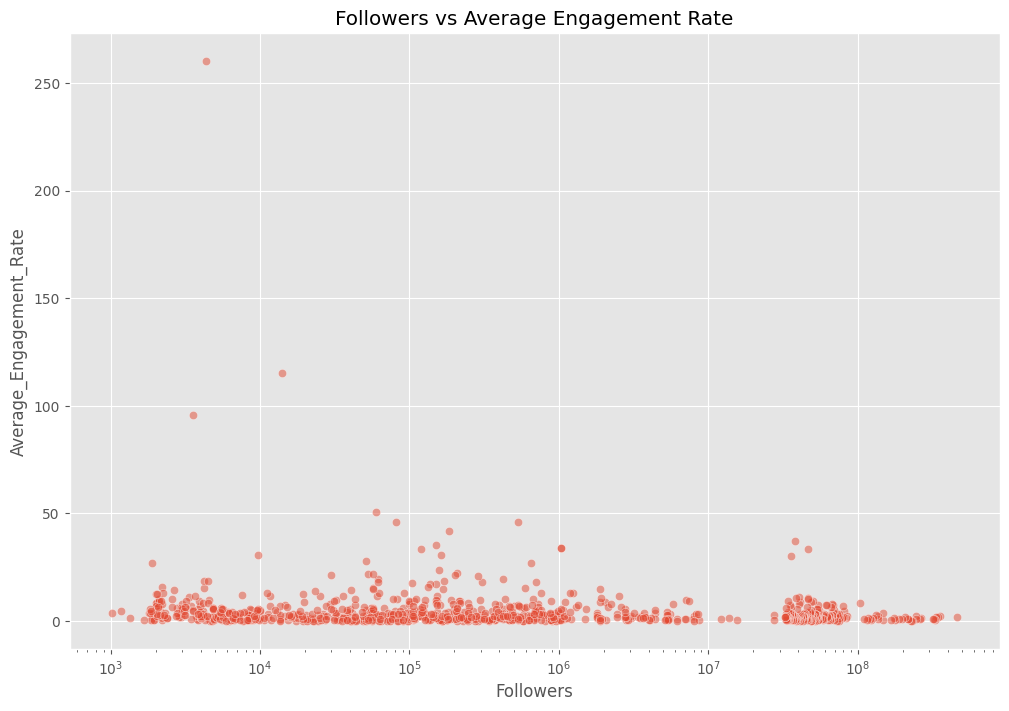

In [17]:
plt.figure(figsize=(12, 8))  
plt.xscale('log')
plt.title("Followers vs Average Engagement Rate")

sns.scatterplot(x="Followers", y="Average_Engagement_Rate", data=df, alpha=0.5)
plt.show()

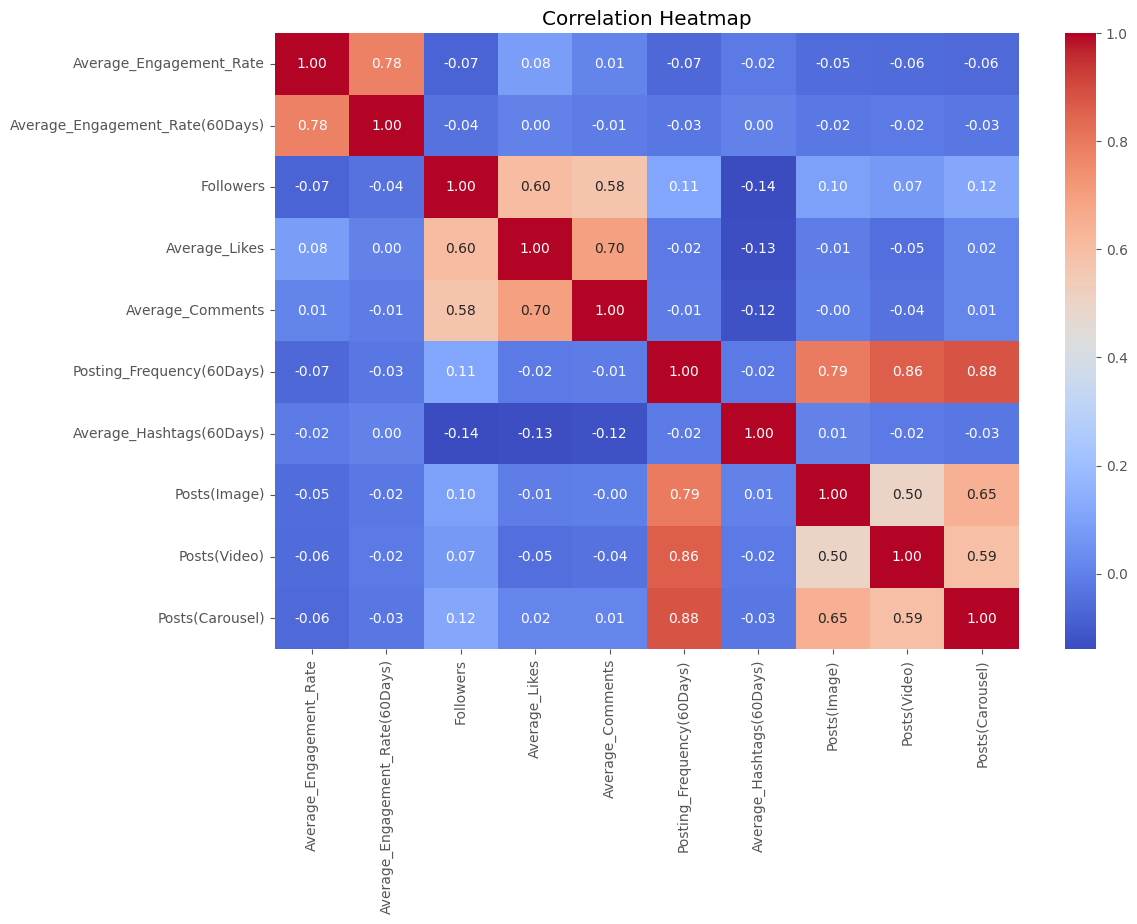

In [59]:
corr = df[["Average_Engagement_Rate", "Average_Engagement_Rate(60Days)", "Followers", "Average_Likes", "Average_Comments", "Posting_Frequency(60Days)", "Average_Hashtags(60Days)", "Posts(Image)", "Posts(Video)", "Posts(Carousel)"]].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


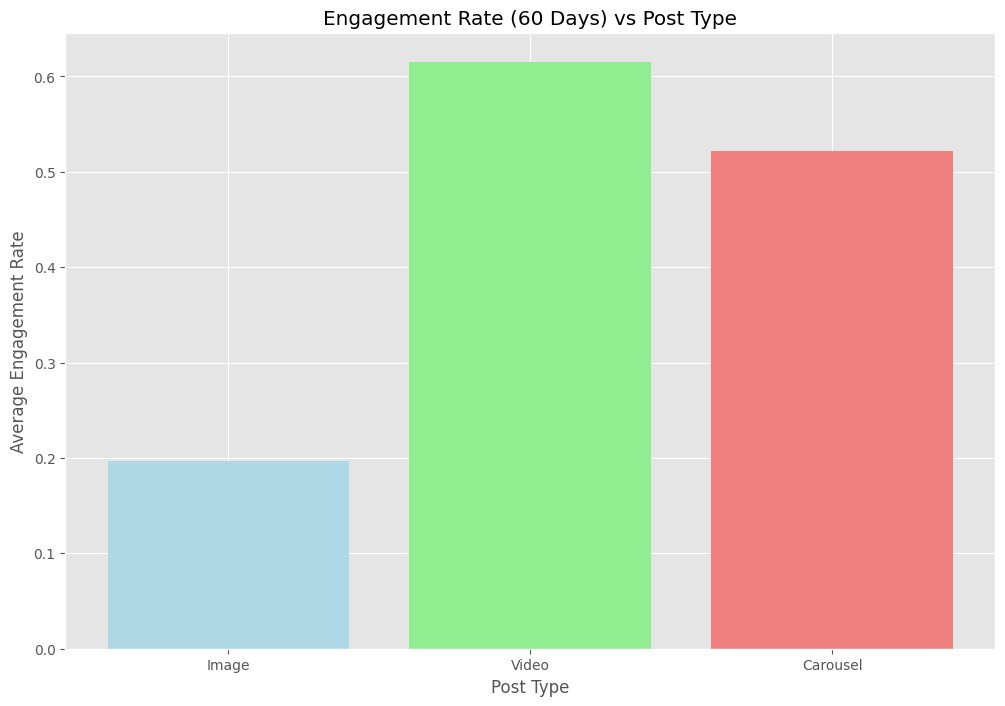

In [17]:
df_image = df[df["Posts(Image)"] > 0].copy()
df_video = df[df["Posts(Video)"] > 0].copy()
df_carousel = df[df["Posts(Carousel)"] > 0].copy()

df_image["Image_Ratio"] = (df_image["Posts(Image)"] / df_image["Posting_Frequency(60Days)"]) * df_image["Average_Engagement_Rate(60Days)"]
df_video["Video_Ratio"] = (df_video["Posts(Video)"] / df_video["Posting_Frequency(60Days)"]) * df_video["Average_Engagement_Rate(60Days)"]
df_carousel["Carousel_Ratio"] = (df_carousel["Posts(Carousel)"] / df_carousel["Posting_Frequency(60Days)"]) * df_carousel["Average_Engagement_Rate(60Days)"]

image_mean = df_image["Image_Ratio"].median()
video_mean = df_video["Video_Ratio"].median()
carousel_mean = df_carousel["Carousel_Ratio"].median()

x = ["Image", "Video", "Carousel"]
means = [image_mean, video_mean, carousel_mean]
colors = ["lightblue", "lightgreen", "lightcoral"]

plt.figure(figsize=(12, 8))
plt.title("Engagement Rate (60 Days) vs Post Type")
plt.bar(x, means, color = colors)
plt.xlabel("Post Type")
plt.ylabel("Average Engagement Rate")

plt.show()

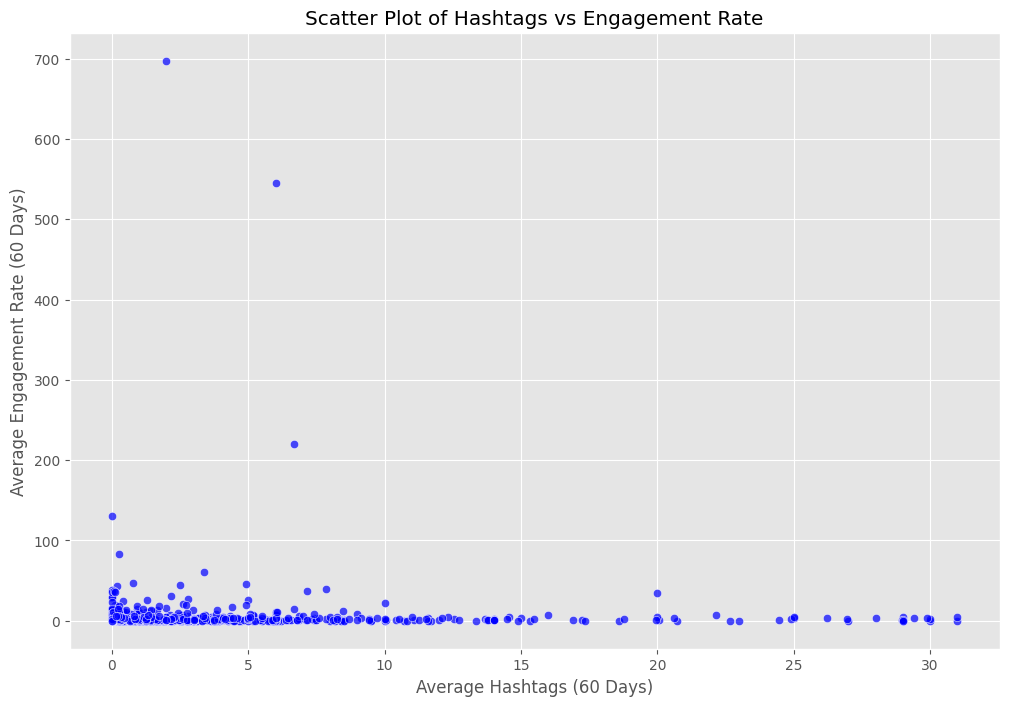

In [25]:
df_cleaned = df[df["Posting_Frequency(60Days)"] > 0].copy()

plt.figure(figsize=(12, 8))
sns.scatterplot(x="Average_Hashtags(60Days)", y="Average_Engagement_Rate(60Days)", data=df, color="blue", alpha=0.7)
plt.xlabel("Average Hashtags (60 Days)")
plt.ylabel("Average Engagement Rate (60 Days)")
plt.title("Scatter Plot of Hashtags vs Engagement Rate")

plt.show()